<a href="https://colab.research.google.com/github/pddiste/pairs/blob/main/pairs_pyquant_01_ws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 741 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from statsmodels.regression.rolling import RollingOLS

import yfinance as yf
import seaborn
import matplotlib.pyplot as plt

In [ ]:
symbol_list = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']
data = yf.download(
    symbol_list, 
    start='2014-01-01', 
    end='2015-01-01'
)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [ ]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            print(keys[i], keys[j])
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                print("pairs: ", pvalue, keys[i], keys[j])
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs, keys

In [ ]:
scores, pvalues, pairs, keys = find_cointegrated_pairs(data)

AAPL AMZN
AAPL GOOG
AAPL META
AAPL NFLX
AMZN GOOG
pairs:  0.03286166049049833 AMZN GOOG
AMZN META
AMZN NFLX
GOOG META
GOOG NFLX
META NFLX


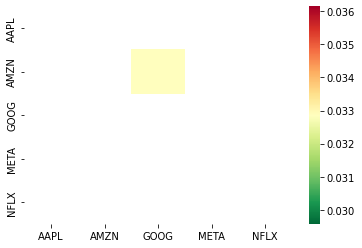

In [ ]:
seaborn.heatmap(
    pvalues, 
    xticklabels=keys, 
    yticklabels=keys, 
    cmap='RdYlGn_r', 
    mask = (pvalues >= 0.05)
)